# Problema 13

This question should be answered using the `Weekly` data set, which is part of the `ISLP` package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?


In [48]:
from ISLP import load_data
import matplotlib.pyplot as plt

In [49]:
Weekly = load_data('Weekly')
print(Weekly.dtypes)
Weekly.head()

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [50]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


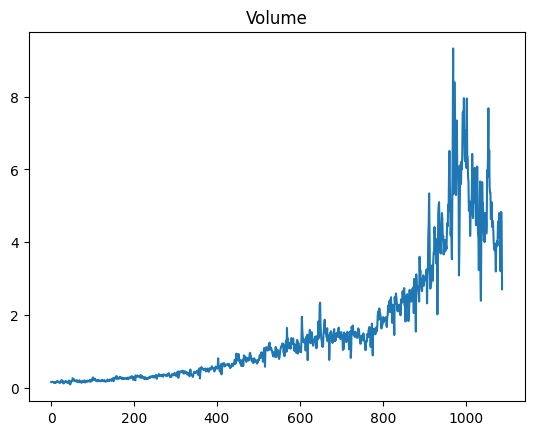

In [51]:
Weekly["Volume"].plot()
plt.title("Volume")
plt.show()

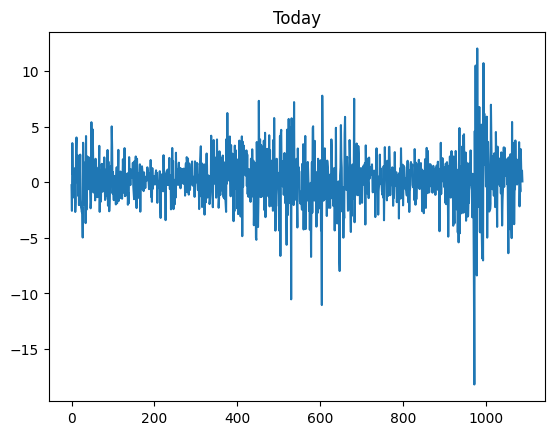

In [52]:
Weekly["Today"].plot()
plt.title("Today")
plt.show()

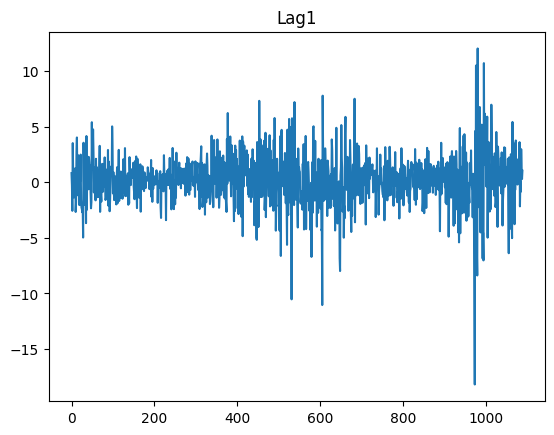

In [53]:
Weekly["Lag1"].plot()
plt.title("Lag1")
plt.show()

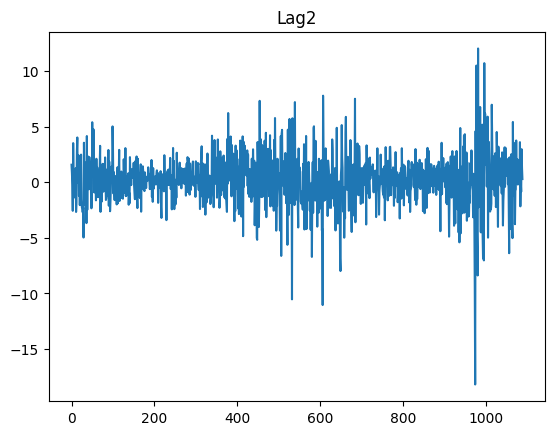

In [54]:
Weekly["Lag2"].plot()
plt.title("Lag2")
plt.show()

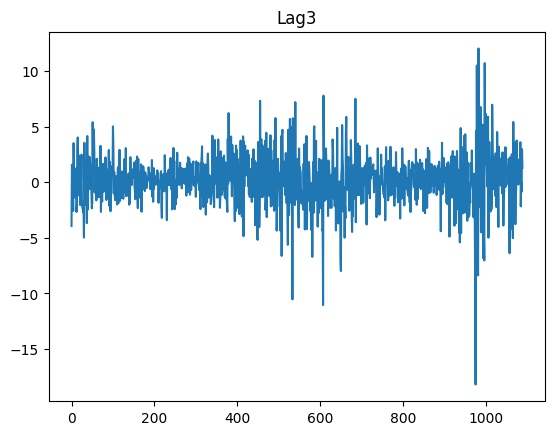

In [55]:
Weekly["Lag3"].plot()
plt.title("Lag3")
plt.show()

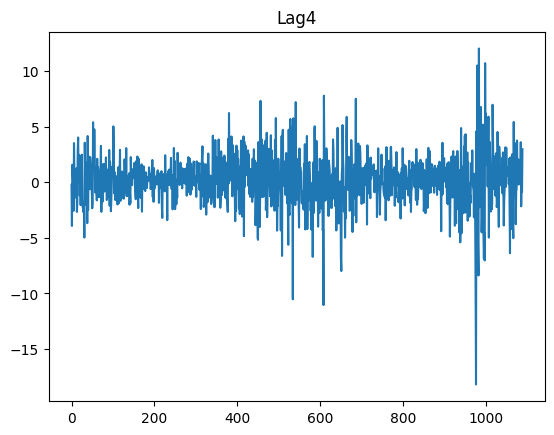

In [56]:
Weekly["Lag4"].plot()
plt.title("Lag4")
plt.show()

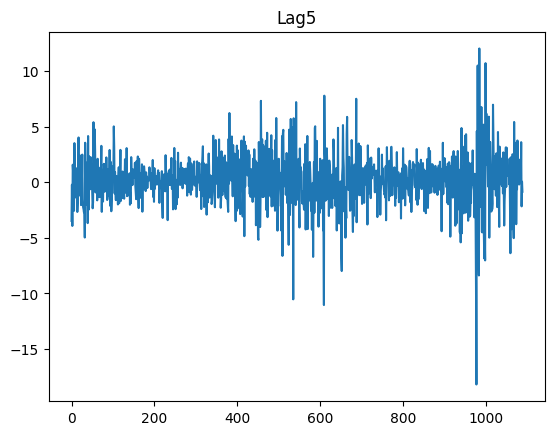

In [57]:
Weekly["Lag5"].plot()
plt.title("Lag5")
plt.show()

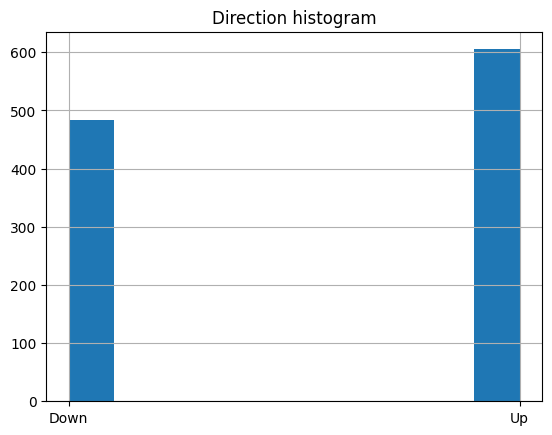

In [58]:
Weekly["Direction"].hist()
plt.title("Direction histogram")
plt.show()

(b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [59]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [60]:
X_train = Weekly[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
y_train = Weekly["Direction"].apply(lambda x: 1 if x == "Up" else 0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.685935
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  871
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            5
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                0.005633
Time:                        15:54:41   Log-Likelihood:                -597.45
converged:                       True   LL-Null:                       -600.83
Covariance Type:            nonrobust   LLR p-value:                    0.2384
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0367      0.030     -1.228      0.219      -0.095       0.022
Lag2           0.0818      0.

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = log_reg.predict(X_test)
predictions = list(map(round, predictions))
cm = confusion_matrix(y_test, predictions)
print(f"Confusion matrix:\n {cm}")
print(f"Test accuracy = {accuracy_score(y_test, predictions)}")

Confusion matrix:
 [[37 47]
 [55 79]]
Test accuracy = 0.5321100917431193
